In [1]:
import pandas as pd
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes



**Objective:** Analyze telecom customer churn using the **Telco Customer dataset** from **Kaggle**.  

**Dataset features:**  
- Customer demographics  
- Subscription details  
- Service usage  
- Account information  

**Goal:** Identify patterns and characteristics of customers who are likely to **churn**, to inform **retention strategies**.




**- converting categorical features into numeric :** 



In [3]:
import numpy as np
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)

df["TotalCharges"].fillna(0, inplace=True)


C:\Users\chahd\AppData\Local\Temp\ipykernel_2060\3487833079.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(0, inplace=True)


In [5]:
df[['PhoneService', 'Dependents','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['PhoneService', 'Dependents','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'No': 0, 'Yes': 1})
df[['MultipleLines']]=df[['MultipleLines']].replace({'No phone service':-1})
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]=df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'No internet service':-1})

C:\Users\chahd\AppData\Local\Temp\ipykernel_2060\288867087.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['PhoneService', 'Dependents','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['PhoneService', 'Dependents','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'No': 0, 'Yes': 1})
C:\Users\chahd\AppData\Local\Temp\ipykernel_2060\288867087.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

In [7]:
internet_mapping = {'No':0, 'DSL': 1, 'Fiber optic': 2}
df['InternetService'] = df['InternetService'].map(internet_mapping)
print(df.dtypes['InternetService'])

int64


In [9]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)
df['Contract'].fillna(-1, inplace=True) 


C:\Users\chahd\AppData\Local\Temp\ipykernel_2060\1252552654.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Contract'].fillna(-1, inplace=True)


In [11]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,0,1,0,-1,1,0,...,0,0,0,0,0,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,0,34,1,0,1,1,...,1,0,0,0,1,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,0,2,1,0,1,1,...,0,0,0,0,0,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,0,45,0,-1,1,1,...,1,1,0,0,1,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,0,2,1,0,2,0,...,0,0,0,0,0,Yes,Electronic check,70.70,151.65,1


In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [15]:
specific_features = ['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract', 'InternetService']
correlation_values = df[['Churn'] + specific_features].corr()['Churn']
print(correlation_values)

Churn              1.000000
TotalCharges      -0.198324
tenure            -0.352229
MonthlyCharges     0.193356
Contract          -0.396713
InternetService    0.316846
Name: Churn, dtype: float64


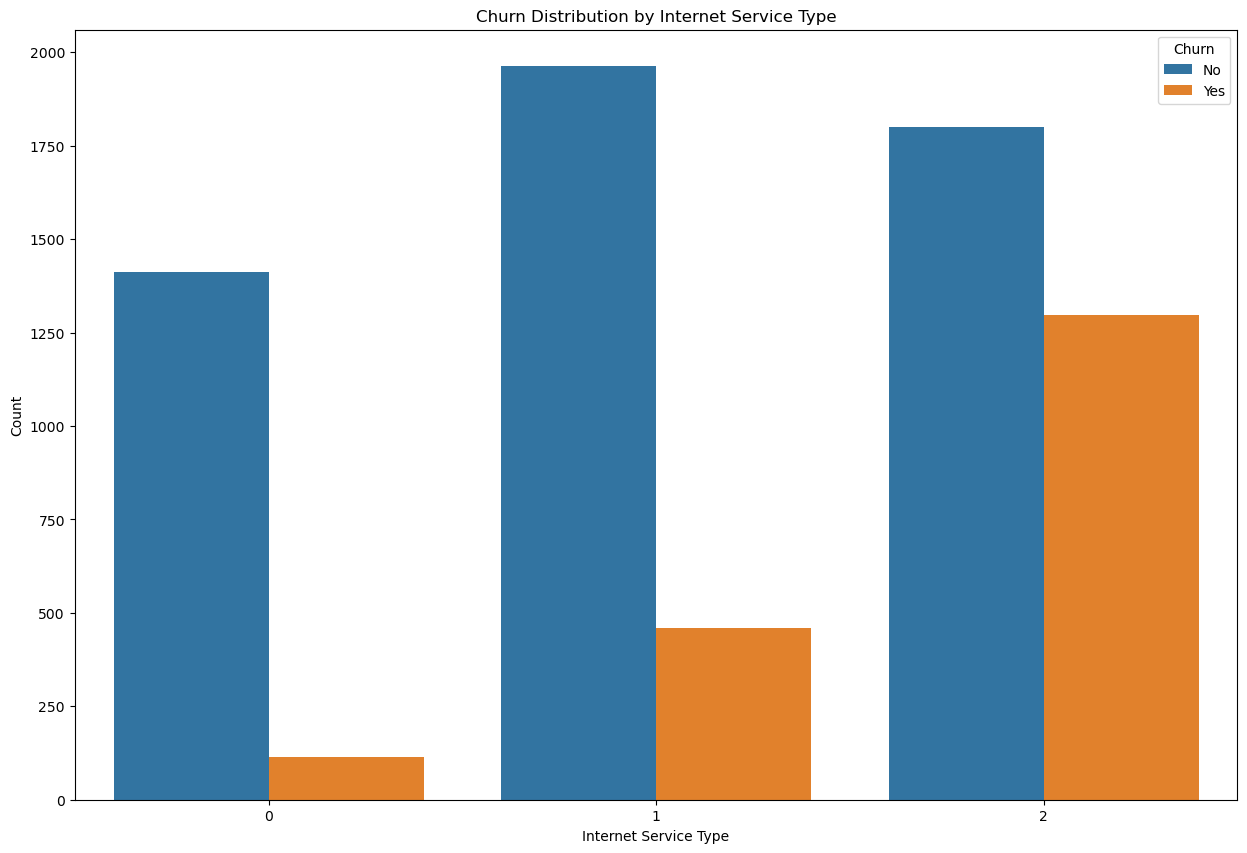

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn Distribution by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])  
plt.show()


The bar chart shows the distribution of churn across different Internet Service Types.
  - Customers with **Internet Service Type 2 (Fiber Optic)** have the **highest churn rate**.
  - **No Internet Service** customers  has the **lowest churn rate**.
  - **Internet Service Type 1(DSL)** has **moderate churn**, but still significantly lower than Type 2.


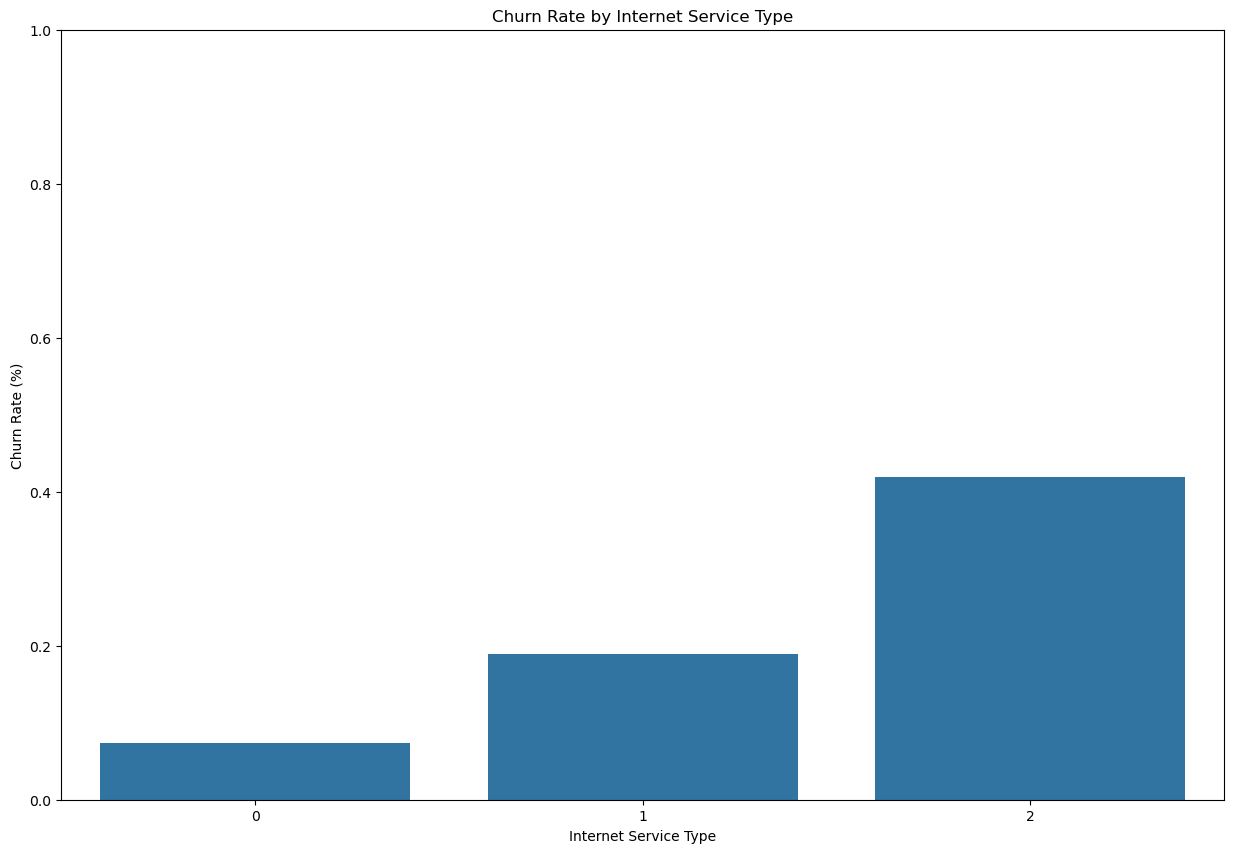

In [53]:
import pandas as pd
churn_rate = df.groupby('InternetService')['Churn'].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='InternetService', y='Churn', data=churn_rate)
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Internet Service Type")
plt.ylim(0, 1)  
plt.show()

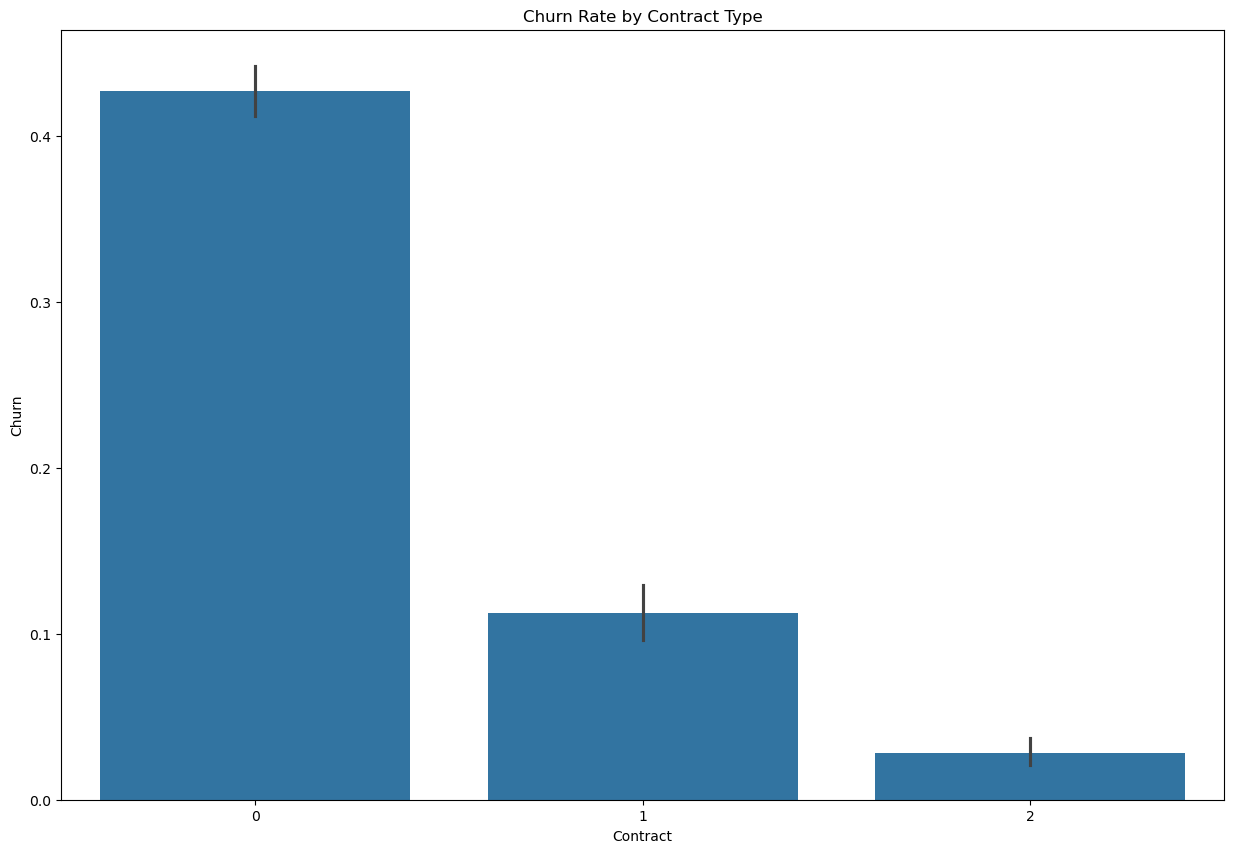

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

In [ ]:
# - Customers with a Month-to-Month contract (represented as 0) have the highest churn rate.
# - Customers with One-Year and Two-Year contracts have significantly lower churn rates.
# - Month-to-Month contracts allow easy cancellation, making it crucial to improve service quality or offer incentives to retain these customers.

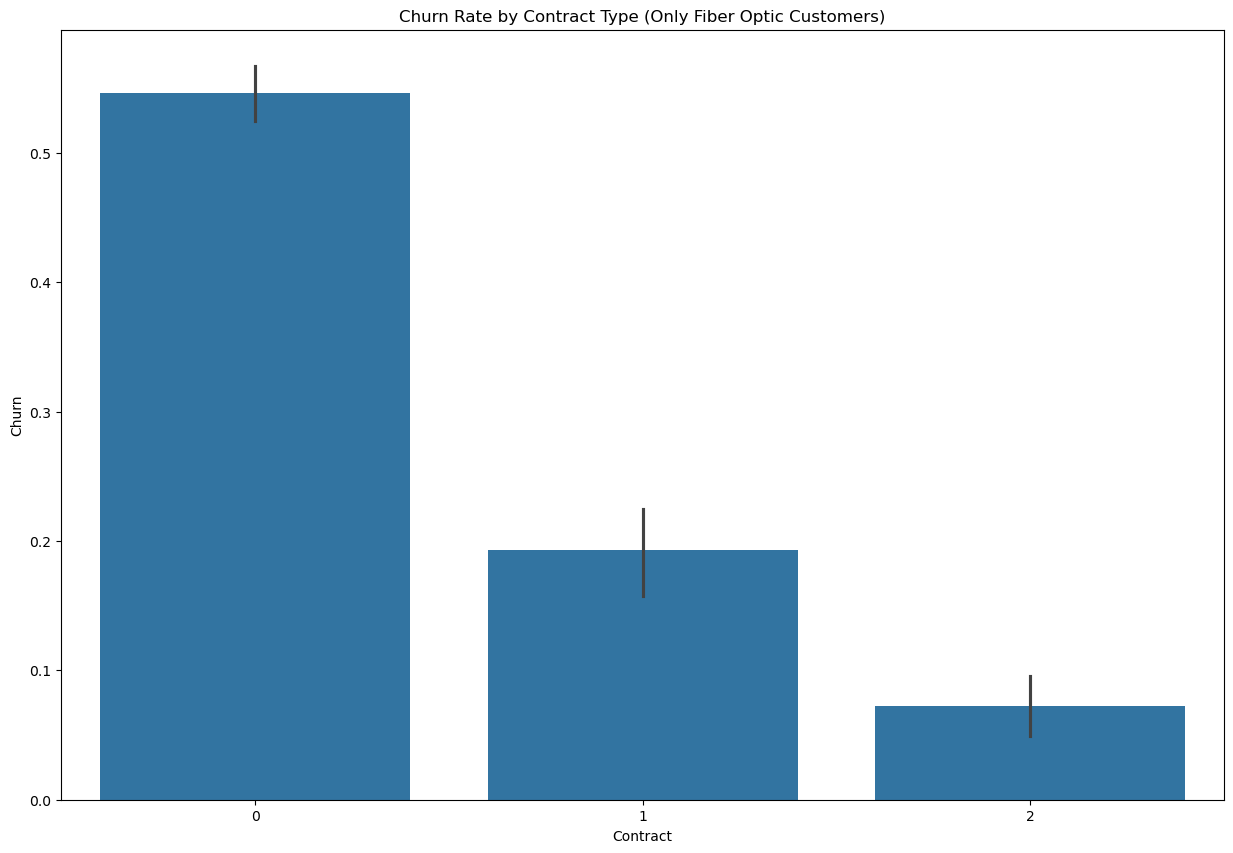

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x='Contract', y='Churn', data=df[df['InternetService'] == 2])
plt.title("Churn Rate by Contract Type (Only Fiber Optic Customers)")
plt.show()


This visualization highlights that customers with **Month-to-Month contract** who use **Fiber Optic internet** have a significantly **higher churn rate**.   
  This suggests 
  - these customers may perceive higher costs, lower satisfaction,or greater flexibility to leave.  
  - Targeted retention strategies (discounts, better customer support, loyalty programs) could help reduce churn in this high-risk group.


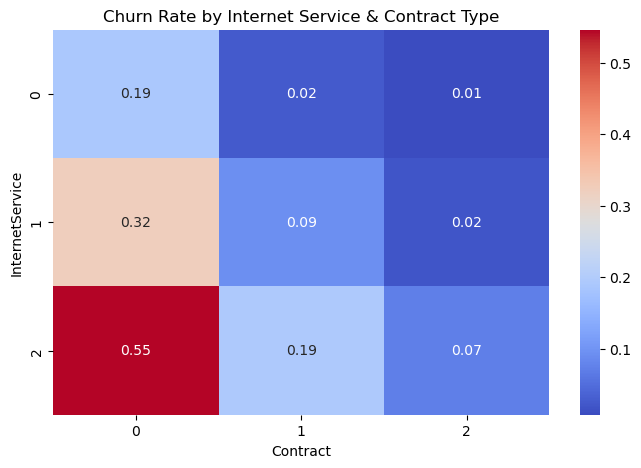

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
churn_rates = df.groupby(['InternetService','Contract'])['Churn'].mean().reset_index()
churn_pivot = churn_rates.pivot(index='InternetService', columns='Contract', values='Churn')
plt.figure(figsize=(8,5))
sns.heatmap(churn_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Churn Rate by Internet Service & Contract Type")
plt.show()

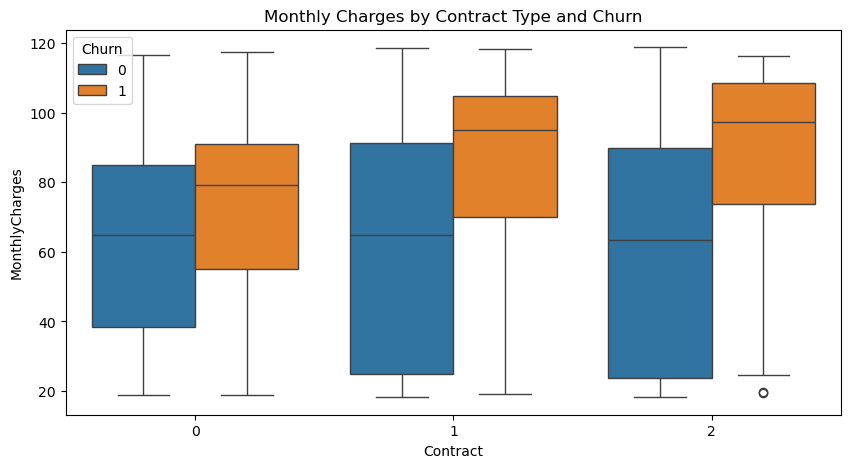

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Monthly Charges by Contract Type and Churn")
plt.show()

- **The distribution of monthly charges** for customers who churned  and those who didn’t appears quite **similar across all contract types**.


- higher monthly charges **slightly correlate** with churn,meaning monthly charges alone may not be the primary driver of customer churn.


- Other factors, like contract type, service quality, or customer satisfaction, could have a stronger impact on churn.

In [31]:
from sklearn.model_selection import train_test_split

# Feature set and target variable
X = df[['PhoneService', 'Dependents', 'MultipleLines', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'MonthlyCharges', 'TotalCharges', 'Contract', 
        'InternetService']]

y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report


class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
weights_dict = {0: class_weights[0], 1: class_weights[1]}


model = LogisticRegression(class_weight=weights_dict, max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7480482611781405
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.81      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



             Feature  Importance
12   InternetService    1.109369
11          Contract    0.964930
0       PhoneService    0.480169
8    StreamingMovies    0.451389
3     OnlineSecurity    0.434657
7        StreamingTV    0.360327
6        TechSupport    0.292304
2      MultipleLines    0.239327
1         Dependents    0.229139
4       OnlineBackup    0.136046
5   DeviceProtection    0.006857
9     MonthlyCharges    0.001132
10      TotalCharges    0.000279


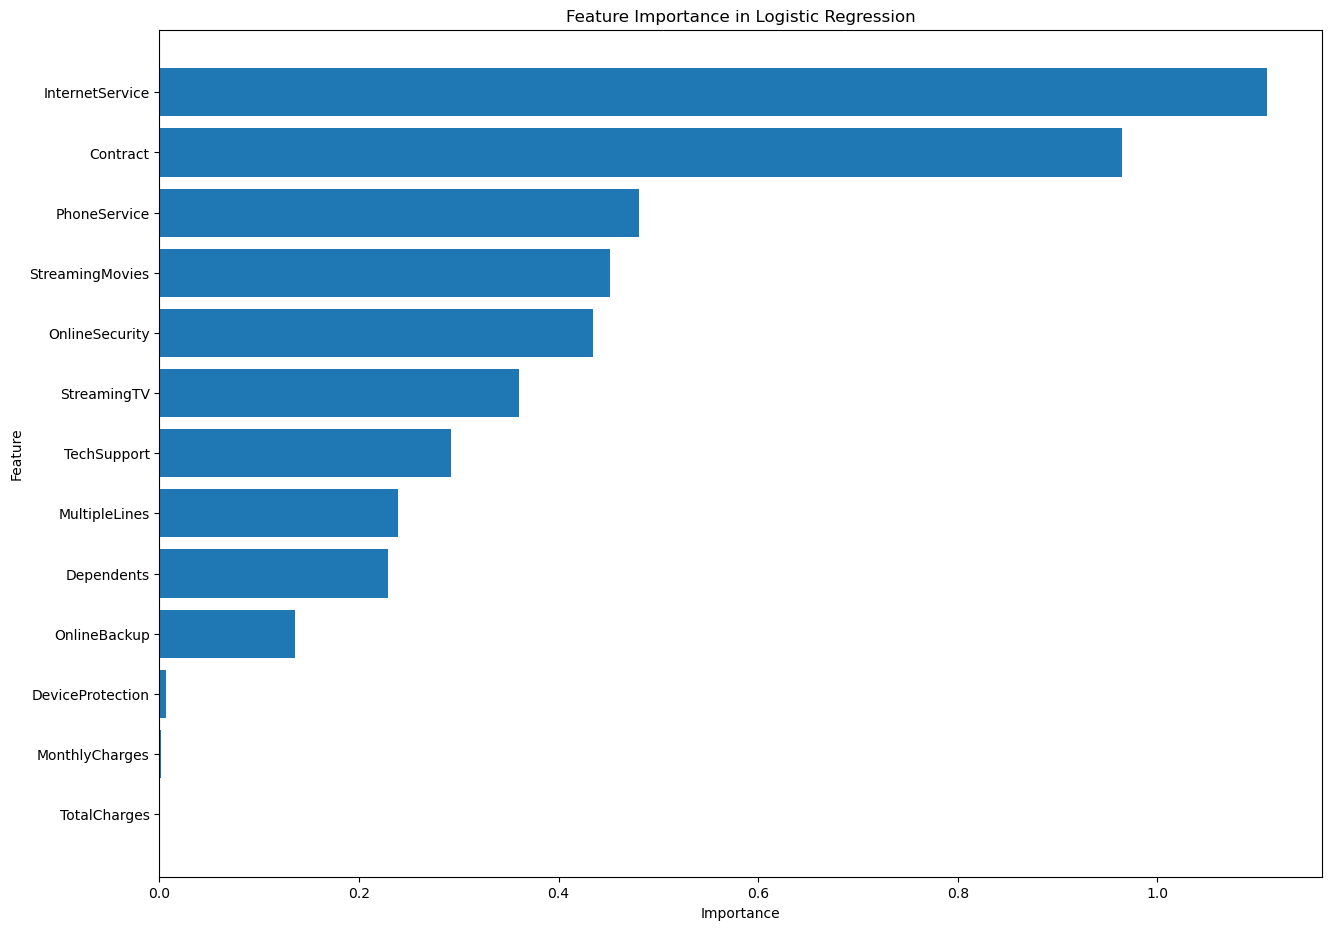

In [63]:
feature_importance = np.abs(model.coef_[0])
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
plt.figure(figsize=(15,11))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

**In the model, the internet service type and contract features have a higher importance, exceeding (0.5)**

### Analysis Based on Data Visualization

From analyzing the data based on the visualizations and the first model, we can conclude the following:

- **High Risk Group**: Customers using `Type 2`(Fiber optic) of `InternetService` and customers with a `Month-to-Month` contract are considered high-risk.
  
- **Low Risk Group**: Customers with a `Type 1`(DSL)  internet service and a contract of either `One Year` or `Two Years` are classified as low-risk.

In [41]:
df['High_Risk_Group'] = ((df['Contract'] == 0) & 
                         (df['InternetService'] == 2) & 
                         (df['PhoneService'])).astype(int)

df['Low_Risk_Group'] = ((df['Contract'].isin([1, 2])) & 
                        (df['InternetService'].isin([0, 1])) & 
                        (df['PhoneService']==1)).astype(int)


X1 = df[['High_Risk_Group','Low_Risk_Group']]
y = df['Churn']


X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)  
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
weights_dict = {0: class_weights[0], 1: class_weights[1]}


model_1 = LogisticRegression(class_weight=weights_dict, max_iter=1000)
model_1.fit(X1_train, y_train)


y_pred = model_1.predict(X1_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7785663591199432
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1036
           1       0.57      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



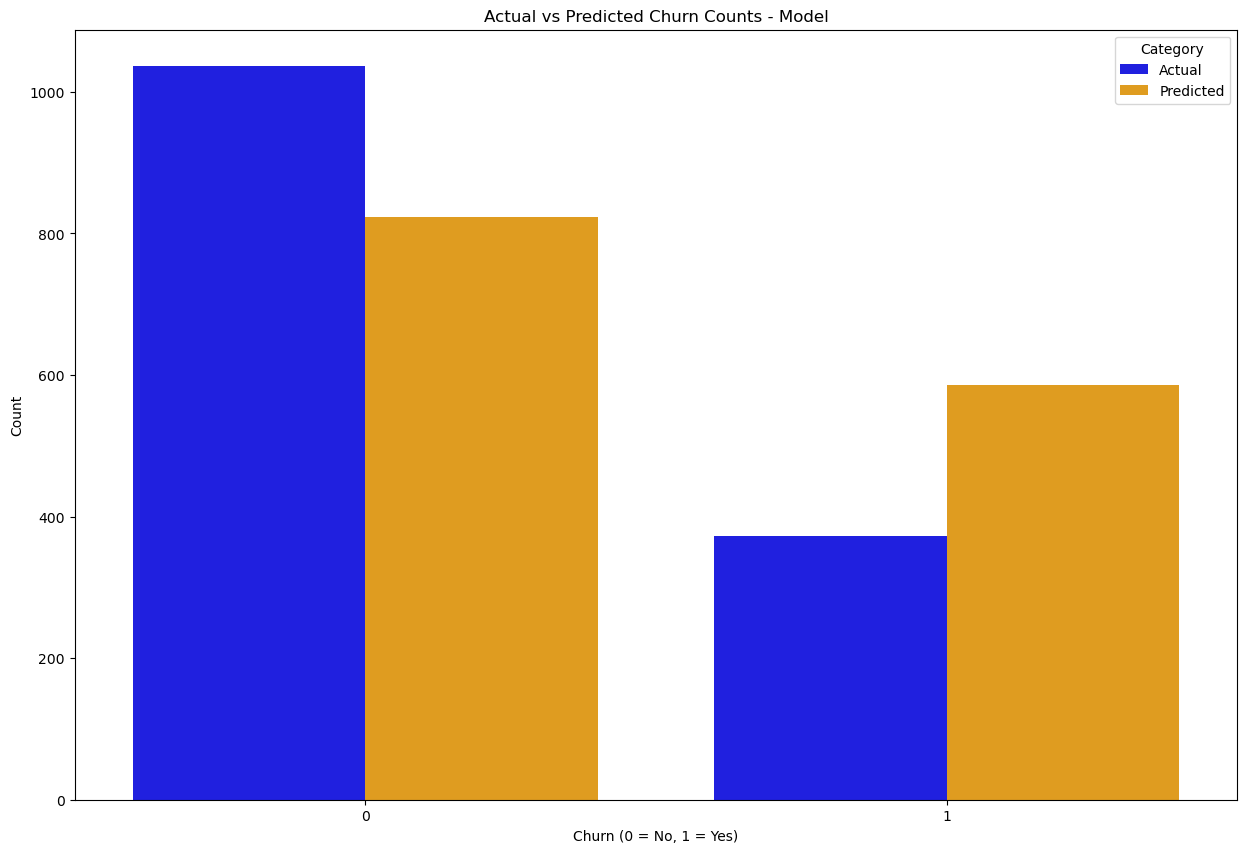

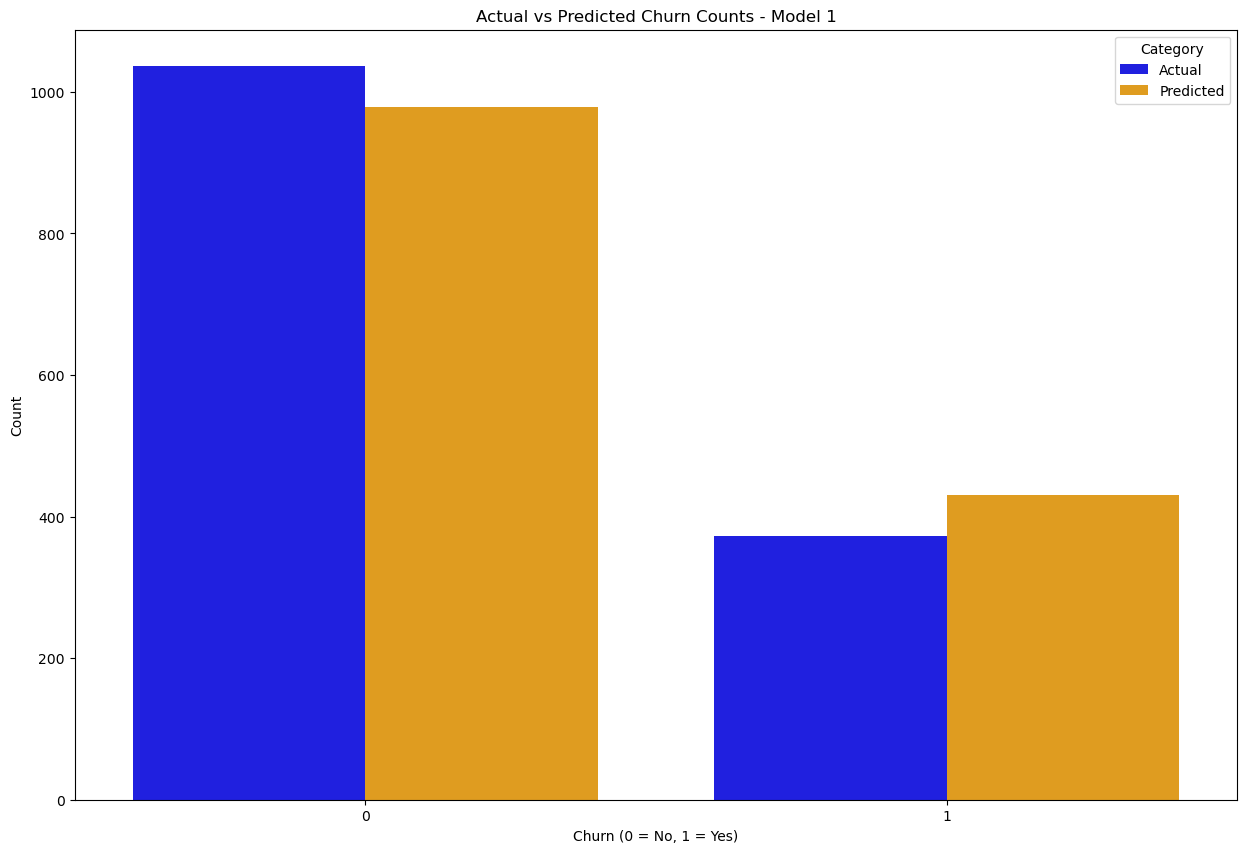

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
y_pred_model = model.predict(X_test)
y_pred_model_1 = model_1.predict(X1_test)
actual_counts = pd.Series(y_test).value_counts().sort_index()
predicted_counts_model = pd.Series(y_pred_model).value_counts().sort_index()
df_plot_model = pd.DataFrame({
    "Actual": actual_counts,
    "Predicted": predicted_counts_model
}).reset_index()
df_plot_model.rename(columns={"index": "Churn"}, inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(x="Churn", y="value", hue="variable", data=df_plot_model.melt(id_vars="Churn"), palette=["blue", "orange"])
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Churn Counts - Model")
plt.legend(title="Category")
plt.show()
predicted_counts_model_1 = pd.Series(y_pred_model_1).value_counts().sort_index()
df_plot_model_1 = pd.DataFrame({
    "Actual": actual_counts,
    "Predicted": predicted_counts_model_1
}).reset_index()
df_plot_model_1.rename(columns={"index": "Churn"}, inplace=True)
plt.figure(figsize=(15,10))
sns.barplot(x="Churn", y="value", hue="variable", data=df_plot_model_1.melt(id_vars="Churn"), palette=["blue", "orange"])
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Churn Counts - Model 1")
plt.legend(title="Category")
plt.show()


Our analysis shows that customers tend to **churn more frequently** when they are on:  
- **Month-to-month contracts**  
- **Using fiber-optic internet service**  
- **Investigating why fiber-optic service shows higher churn**

To address this, the business can consider:  
- **Offering more attractive long-term contracts** with incentives  
- **Improving the value of fiber-optic services** by bundling them with additional perks  
- **Implementing targeted loyalty programs**  

Additionally, **proactive retention campaigns**, **superior customer support**, and **flexible contract options**

